# Kolmogorov-Smirnov Test

<IPython.core.display.Javascript object>


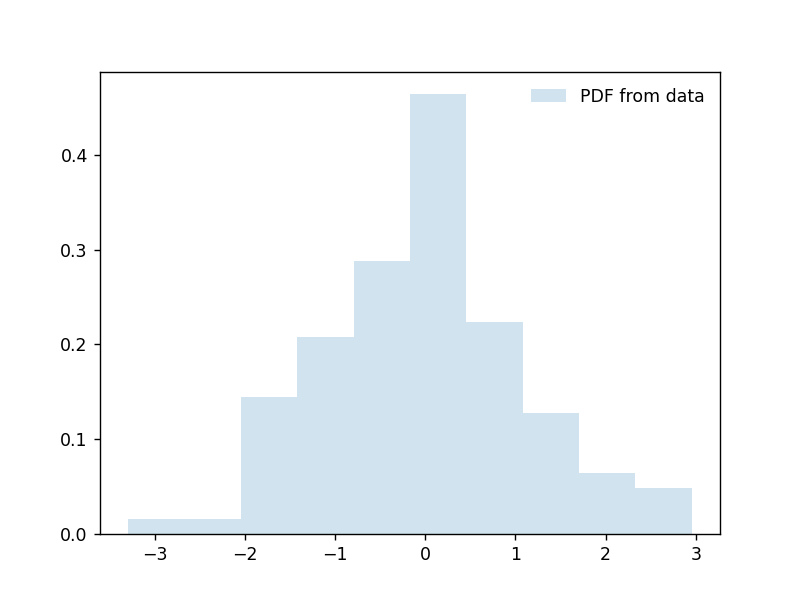

KstestResult(statistic=0.3773750335643133, pvalue=0.0)

In [136]:
%matplotlib notebook
import numpy as np
from scipy import stats

def calc_pdf(data, bins=10):
    # getting data of the histogram
    count, bins_count = np.histogram(data, bins=bins)
    pdf = count / sum(count)
    return pdf, bins_count

def calc_cdf(data, bins=10):
    pdf, bins_count = calc_pdf(data, bins)
    cdf = np.cumsum(pdf)
    return bins_count[1:], cdf

rng = np.random.default_rng()

r = stats.norm.rvs(loc=0, scale=1, size=100)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="PDF from data")
ax.legend(loc='best', frameon=False)
plt.show()

stats.kstest(x, 'norm')

<IPython.core.display.Javascript object>


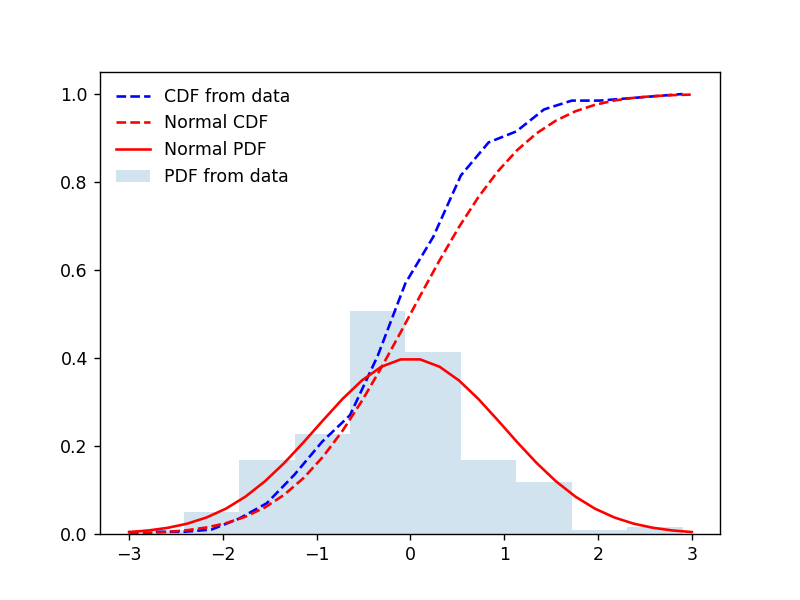

KstestResult(statistic=0.12003826630148351, pvalue=0.005724428126327288)

In [173]:
###########################################
# KS One-Sample test

r = stats.norm.rvs(loc=0, scale=1, size=200)
bc, cdf = calc_cdf(r, 20)

xs = np.linspace(-3, 3, 30)

fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="PDF from data")
ax.plot(bc, cdf, 'b--', label="CDF from data")
ax.plot(xs, stats.norm.cdf(xs, 0, 1), 'r--', label="Normal CDF")
ax.plot(xs, stats.norm.pdf(xs, 0, 1), label="Normal PDF", color="red")
ax.legend(loc='best', frameon=False)
plt.show()

stats.kstest(r, 'norm')

<IPython.core.display.Javascript object>


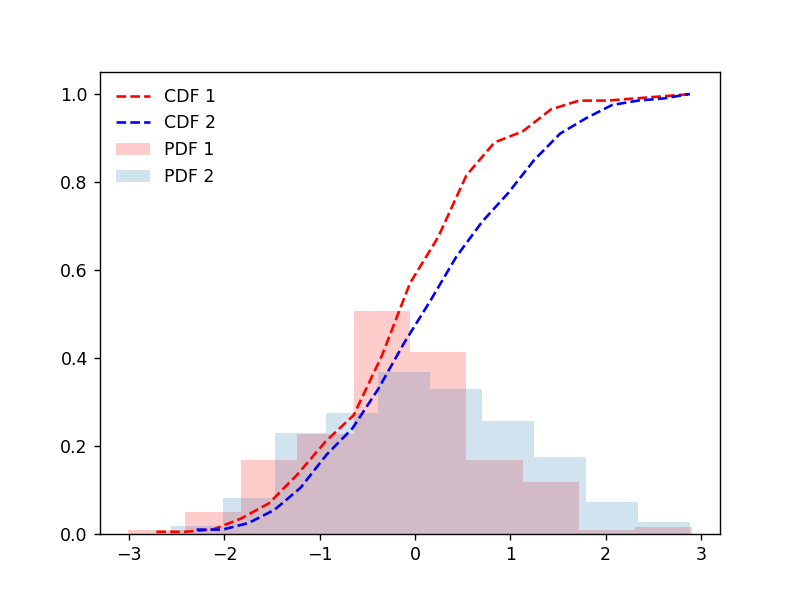

Ks_2sampResult(statistic=0.17, pvalue=0.006094418258803505)

In [192]:
###########################################
# KS Two-Sample test 

r2 = stats.norm.rvs(loc=0, scale=1, size=200)
bc2, cdf2 = calc_cdf(r2, 20)

fig, ax = plt.subplots(1, 1)
ax.hist(r, color='r', density=True, histtype='stepfilled', alpha=0.2, label="PDF 1")
ax.hist(r2, density=True, histtype='stepfilled', alpha=0.2, label="PDF 2")

ax.plot(bc, cdf, 'r--', label="CDF 1")
ax.plot(bc2, cdf2, 'b--', label="CDF 2")
ax.legend(loc='best', frameon=False)
plt.show()

###################################


stats.ks_2samp(r, r2)


# Kullback-Leibler and Jensen-Shannon Divergences

In [193]:
import numpy as np

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# calculate the js divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

p, _ = calc_pdf(r, 10)
q, _ = calc_pdf(r2, 10)

print('KL Divergence: ' , kl_divergence(p, q))
print('JS Divergence: ' , js_divergence(p, q))


KL Divergence:  0.07552985373634882
JS Divergence:  0.020226002367202314


In [194]:
r2 = stats.norm.rvs(loc=0, scale=2, size=200)

q, _ = calc_pdf(r2, 10)

print('KL Divergence: ' , kl_divergence(p, q))
print('JS Divergence: ' , js_divergence(p, q))

KL Divergence:  0.22121380606263247
JS Divergence:  0.05689329980941413


# Chi-square Test

In [264]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import numpy as np

arr1 = [16, 18, 16, 14, 12, 12]
arr2 = [16, 16, 16, 12, 15, 13]
# arr2 = [5, 6, 6, 6, 5, 4]

# Goodness for fit
# H0: Sample are drawn from the sample distribution
print("Chi-square goodness for fit")
print(chisquare(arr1, f_exp=arr2))

# Test for Independence
# H0: Two populations are independent
obs = np.array([arr1, arr2])
chi2, p, dof, ex = chi2_contingency(obs, correction=True)
print("Chi-square Independence:")
print("Chi-square statitic: ", chi2)
print("p-value: " , p)
print("DOF: " , dof)
print("Expected values:" , ex)


Chi-square goodness for fit
Power_divergenceResult(statistic=1.26025641025641, pvalue=0.938967636084074)
Chi-square Independence:
Chi-square statitic:  0.6448265460030166
p-value:  0.9858589756335846
DOF:  5
Expected values: [[16.  17.  16.  13.  13.5 12.5]
 [16.  17.  16.  13.  13.5 12.5]]


In [265]:
print("Chi-square goodness for fit: obs vs exp")
print(stats.chisquare(obs.ravel(), f_exp=ex.ravel(), ddof=obs.size - 1 - dof))


Chi-square goodness for fit: obs vs exp
Power_divergenceResult(statistic=0.6448265460030166, pvalue=0.9858589756335846)
